In [2]:
import pandas as pd
import numpy as np

In [3]:
songs = pd.read_csv("dataset.csv")

In [5]:
songs.columns = ["Unnamed", "track_id", "artists", "album_name", "track_name", 
                 "popularity", "duration_ms", "explicit", "danceability", 
                 "energy", "key", "loudness", "mode", "speechiness", 
                 "acousticness", "instrumentalness", "liveness", "valence",
                 "tempo", "time_signature", "track_genre"]
songs

,Unnamed,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [6]:
features = ["popularity", "duration_ms", "explicit", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]

In [23]:
import re

songs = songs.dropna(subset = features)
target_genres = ['pop', 'dance', 'rock','post-teen-pop', 'hip-hop', 'indie-pop', 'songwriter', 'emo', 'electronic','edm']
pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, target_genres)))
filtered_rows = songs[songs['track_genre'].isin(target_genres)]
columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
filtered_columns = filtered_rows[columns]
pd.set_option('future.no_silent_downcasting', True)
filtered_columns['track_genre'] = filtered_columns['track_genre'].replace({'pop': 1, 'dance': 2, 'rock': 3, 'post-teen-pop': 4, 'hip-hop': 5, 'indie-pop': 6, 'songwriter': 7, 'emo': 8, 'electronic': 9, 'edm': 10})

filtered_columns

C:\Users\14707\AppData\Local\Temp\ipykernel_17380\3068351531.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns['track_genre'] = filtered_columns['track_genre'].replace({'pop': 1, 'dance': 2, 'rock': 3, 'post-teen-pop': 4, 'hip-hop': 5, 'indie-pop': 6, 'songwriter': 7, 'emo': 8, 'electronic': 9, 'edm': 10})


,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20000,96,184613,0.733,0.690,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,2
20001,100,156943,0.714,0.472,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,2
20002,73,185815,0.722,0.757,-6.207,0,0.1320,0.18500,0.000006,0.1260,0.721,140.094,4,2
20003,83,221176,0.742,0.882,-2.862,1,0.1170,0.04660,0.000000,0.2060,0.463,102.040,4,2
20004,84,244960,0.748,0.524,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.661,95.010,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102995,66,248160,0.573,0.406,-11.946,1,0.0361,0.65300,0.475000,0.1230,0.376,130.021,4,7
102996,60,176853,0.690,0.582,-6.259,0,0.0333,0.35800,0.000000,0.0776,0.448,122.020,4,7
102997,42,269354,0.551,0.478,-10.580,0,0.0378,0.52600,0.000000,0.2880,0.523,98.056,4,7
102998,0,316066,0.449,0.571,-7.119,1,0.0492,0.00604,0.701000,0.0748,0.448,84.807,4,7


In [18]:
from sklearn.preprocessing import StandardScaler

data = filtered_columns
data = StandardScaler().fit_transform(data)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data)
data = pca.transform(data)
data

array([[-0.54326624, -0.31554229],
       [ 0.32890798, -0.42612056],
       [-1.27426441, -1.07607614],
       ...,
       [ 1.48378637,  0.10339287],
       [ 0.95697568,  2.57466502],
       [ 2.24590654, -1.33850995]])

In [26]:
dataframe = pd.DataFrame(data = data, columns = ['principal component 1', 'principal component 2'])
dataframe['track genre'] = filtered_columns['track_genre'].values
dataframe

,principal component 1,principal component 2,track genre
0,-0.543266,-0.315542,2
1,0.328908,-0.426121,2
2,-1.274264,-1.076076,2
3,-1.614732,-0.248955,2
4,0.419897,-1.244734,2
...,...,...,...
8995,2.990936,1.022353,7
8996,0.167176,-0.404538,7
8997,1.483786,0.103393,7
8998,0.956976,2.574665,7


Text(0.5, 1.0, 'PCA Analysis')

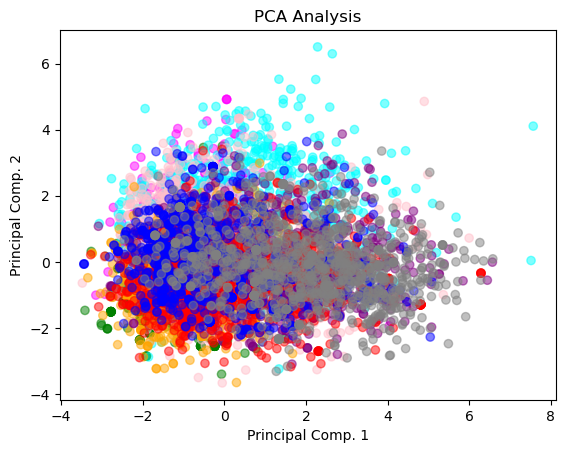

In [30]:
import matplotlib.pyplot as plt

x = dataframe.loc[:, "principal component 1"]
y = dataframe.loc[:, "principal component 2"]

color_map = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'orange',
    6: 'purple',
    7: 'gray',
    8: 'pink',
    9: 'cyan',
    10: 'magenta'
}

# Plotting all data points
plt.scatter(x, y, c = dataframe["track genre"].map(color_map), alpha = 0.5)

plt.xlabel("Principal Comp. 1")
plt.ylabel("Principal Comp. 2")
plt.title("PCA Analysis")


The above plot is colored by genre.

In [32]:
reduced_dataframe = dataframe.sample(n = 500)
reduced_dataframe

,principal component 1,principal component 2,track genre
8277,0.080511,0.036497,7
8354,3.145338,0.453372,7
2867,-0.633476,0.476198,9
1433,-1.190480,-0.438552,10
7666,-1.359255,-0.167558,3
...,...,...,...
6862,-1.002746,-0.084205,1
7486,0.077644,-0.014814,3
339,-1.588647,-0.656757,2
4591,-2.042800,-2.065736,5


Text(0.5, 1.0, 'PCA Analysis (Reduced)')

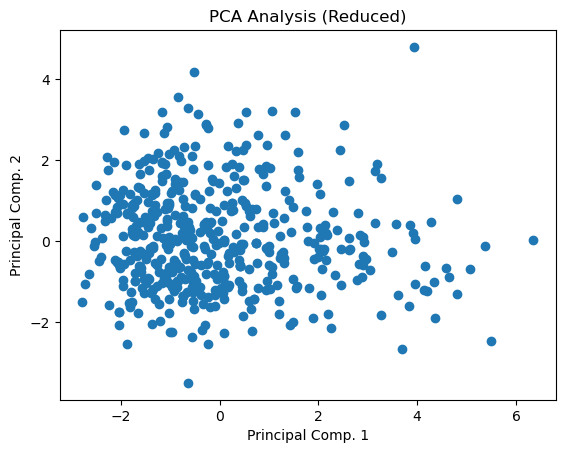

In [33]:
r_x = reduced_dataframe.loc[:, "principal component 1"]
r_y = reduced_dataframe.loc[:, "principal component 2"]

plt.scatter(r_x, r_y)

plt.xlabel("Principal Comp. 1")
plt.ylabel("Principal Comp. 2")
plt.title("PCA Analysis (Reduced)")

In [34]:
pca.explained_variance_ratio_

array([0.19955898, 0.11454623])

In [38]:
# Making a 3D scatterplot

data_3d = filtered_columns
from sklearn.preprocessing import StandardScaler
data_3d = StandardScaler().fit_transform(data_3d)
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(data_3d)
data_3d = pca.transform(data_3d)
data_3d


array([[-0.54332934, -0.31474965,  0.84071687],
       [ 0.3288095 , -0.42487559,  0.33238896],
       [-1.27427972, -1.07582718,  0.33680132],
       ...,
       [ 1.48382922,  0.10292999,  0.51304316],
       [ 0.95705401,  2.57340555,  0.95706138],
       [ 2.24583691, -1.33774608,  0.90372338]])

In [39]:
dataframe_2 = pd.DataFrame(data = data_3d, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
dataframe_2['track genre'] = filtered_columns['track_genre'].values
dataframe_2

,principal component 1,principal component 2,principal component 3,track genre
0,-0.543329,-0.314750,0.840717,2
1,0.328809,-0.424876,0.332389,2
2,-1.274280,-1.075827,0.336801,2
3,-1.614813,-0.247868,0.175834,2
4,0.419809,-1.243570,0.070497,2
...,...,...,...,...
8995,2.990890,1.022795,1.260857,7
8996,0.167159,-0.404452,0.848856,7
8997,1.483829,0.102930,0.513043,7
8998,0.957054,2.573406,0.957061,7


<module 'matplotlib.pyplot' from 'c:\\Users\\14707\\miniconda3\\envs\\myenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

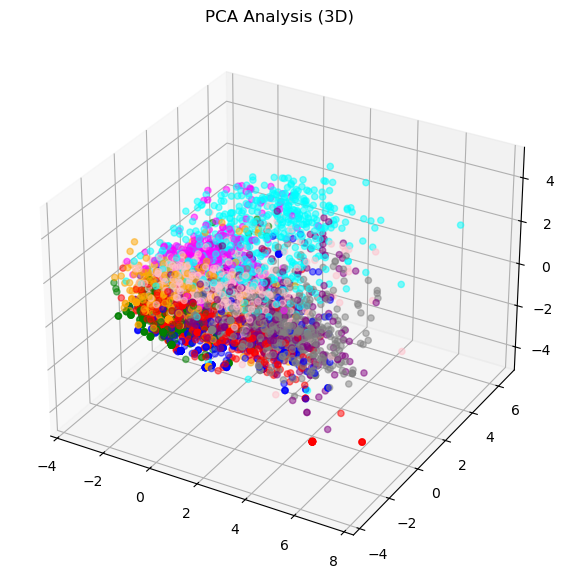

In [41]:
import matplotlib.pyplot as plt

x = dataframe_2.loc[:, "principal component 1"]
y = dataframe_2.loc[:, "principal component 2"]
z = dataframe_2.loc[:, "principal component 3"]

color_map = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'orange',
    6: 'purple',
    7: 'gray',
    8: 'pink',
    9: 'cyan',
    10: 'magenta'
}

# Plotting all data points
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

ax.scatter3D(x, y, z, c = dataframe_2["track genre"].map(color_map), alpha = 0.5)
plt.title("PCA Analysis (3D)")

plt

The above plot is colored by genre.

In [42]:
pca.explained_variance_ratio_

array([0.19955899, 0.11454657, 0.09872621])

Sources:
https://www.youtube.com/watch?v=SBYdqlLgbGk
https://builtin.com/machine-learning/pca-in-python
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
https://www.youtube.com/watch?v=lX-3nGHDhQg&t=289s
https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/
